In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

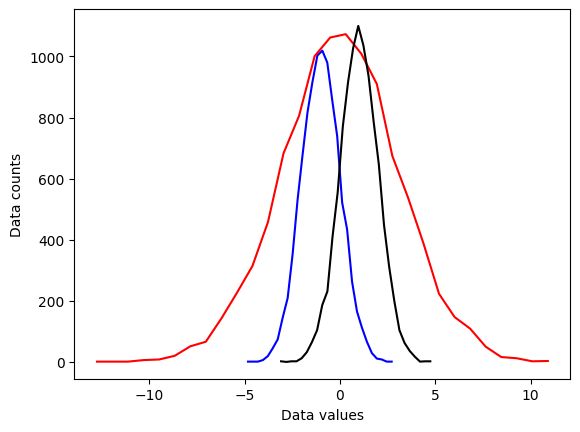

In [3]:
## create some data distribution

# the distribution
N = 10001 # number of data points
nbins = 30 # numbr of historgram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2

plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [4]:
# side note:
meanval = 10.2
stdval = 7.5
numsamp = 123

# this
np.random.normal(meanval,stdval,numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval+meanval

array([-5.07062634e+00,  2.48325907e+01,  2.12034300e-01,  9.27543990e+00,
        3.58394620e+00,  1.93055486e+01,  7.90679176e-02, -4.88848842e+00,
        8.71573292e+00, -2.95657294e+00,  2.10758565e+01,  1.06342013e+01,
        6.52773246e+00,  8.64056804e+00,  1.43188398e+01,  1.53614344e+01,
        1.53477779e+01,  1.32226569e+01,  1.31203368e+01,  1.39159614e+00,
        1.72330993e+01,  2.13081727e+01,  1.79233420e+01,  7.99737193e+00,
        1.02513155e+01,  8.94735279e-01,  1.20270689e+01,  7.36125205e+00,
       -3.04488603e+00,  1.78334435e+01,  4.69945544e+00,  4.63664950e-01,
        2.20171605e+01,  2.52881741e+00,  1.95122737e+01,  6.47447773e+00,
        1.10617749e+01,  2.24649746e+00,  1.04548720e+01,  4.10802151e+00,
        1.23542604e+01,  2.51375822e+00,  7.71418638e+00,  3.89586311e+00,
        7.80121094e+00,  1.65482256e+01,  1.26124729e+01,  1.97197162e+01,
        2.17019275e+00,  5.63680465e+00,  7.29048528e+00,  1.60444142e+01,
        1.30346232e+01,  

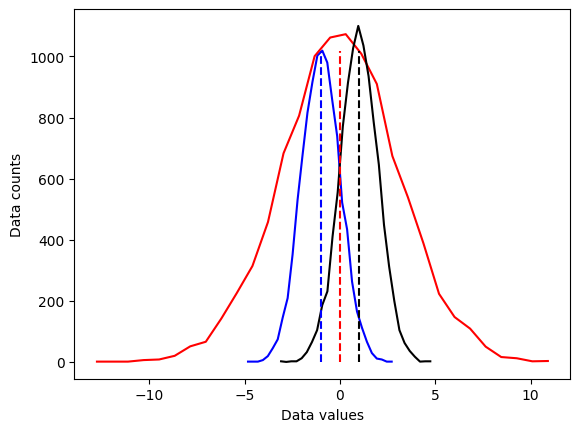

In [9]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y1)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y1)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

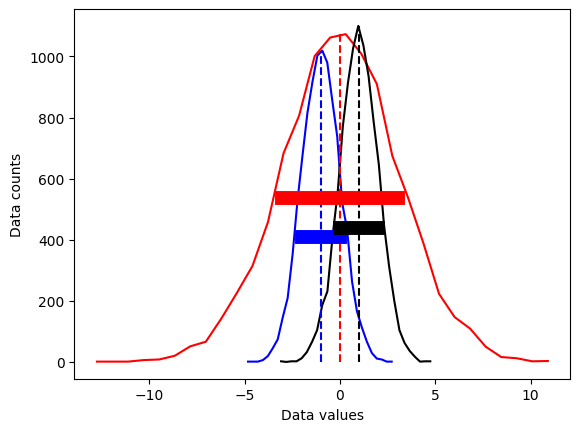

In [62]:
## now for the standard deviation

#initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)

# same plot as earlier
plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--',[mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now ad stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.4*max(y3),.4*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

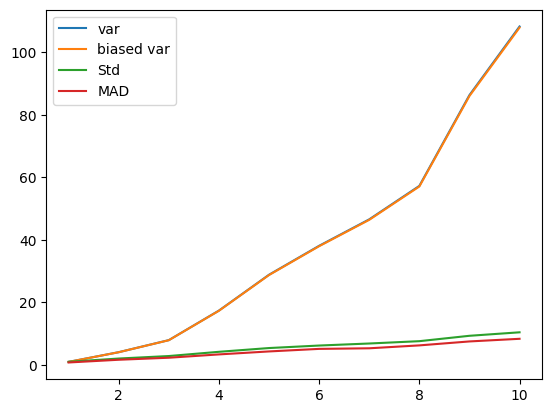

In [35]:
## different variance measures

variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):

    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)

    #variance
    varmeasures[0,i] = sum(datacent**2)/(N-1)

    #편향 분산, 데이터 수가 적으면 적을수록, 비편향 분산과의 차이가 커진다.
    #'biased' variance
    varmeasures[1,i] = sum(datacent**2)/N
    
    #standard deviation
    varmeasures[2,i] =  np.sqrt(sum(datacent**2)/(N-1))

    # MAD
    varmeasures[3,i] = sum(abs(datacent))/(N-1)

# show them!
plt.plot(variances,varmeasures.T)
plt.legend(('var','biased var','Std','MAD'))
plt.show()

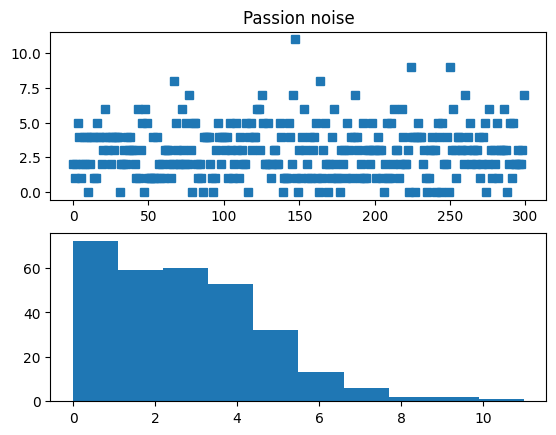

In [39]:
# Fano factor and coefficient of variation(CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300) #"Poisson noise"

fig, ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Passion noise')

ax[1].hist(data)
plt.show()

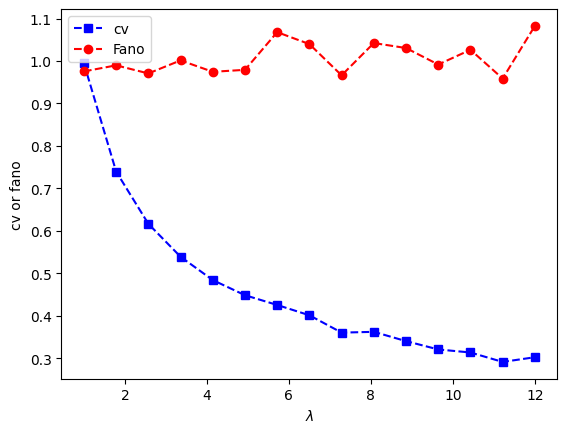

2.571428571428571


In [65]:
## compute fano factor and CV for a range of Lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

#initalize output vectors
fano = np.zeros(len(lambdas))
cv = np.zeros(len(lambdas))

for li in range(len(lambdas)):

    # generate new data
    data = np.random.poisson(lambdas[li],1000)

    #compute the metrics
    cv[li] =  np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)

# and plot
plt.plot(lambdas,cv,'bs--')
plt.plot(lambdas,fano,'ro--')
plt.legend(('cv','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('cv or fano')
plt.show()
print(lambdas[2])